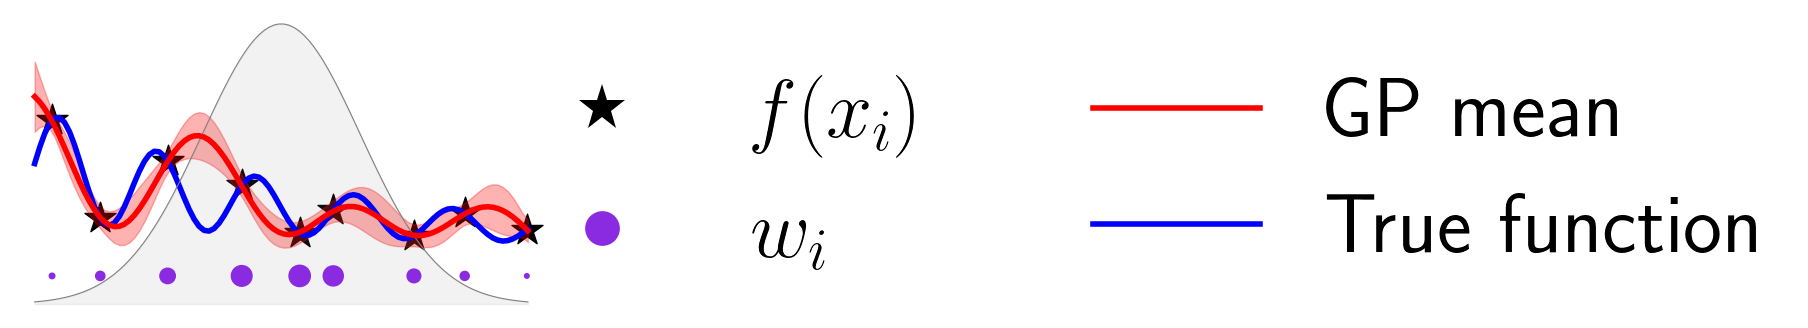

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from matplotlib.lines import Line2D

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')


# Generate sample data
def fancy_positive_function(X):
    return (np.exp(-0.3 * X) * (np.sin(2 * np.pi * X) + 1.5) + 1) / 10


np.random.seed(0)
X_train = np.linspace(0, 5, 9).reshape(-1, 1) 
X_train += np.random.normal(0, 0.1, X_train.shape) 
y_train = fancy_positive_function(X_train).ravel()

# Generate test data
X_test = np.linspace(0, 5, 100).reshape(-1, 1)

# Set regularization parameter and kernel parameter
y_pred = fancy_positive_function(X_test).ravel()

from scipy.stats import norm
mean = 2.5
std_dev = 0.8
x_gaussian = np.linspace(0, 5, 100)
y_gaussian = norm.pdf(x_gaussian, mean, std_dev)

weights = norm.pdf(X_train, mean, 1.0).ravel()


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define a kernel for the GP
kernel = C(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-4, n_restarts_optimizer=10)

# Fit GP to the training data
gp.fit(X_train, y_train)

# Predict the mean and standard deviation of the GP posterior at test points
y_mean, y_std = gp.predict(X_test, return_std=True)


# Plot results
fig, ax = plt.subplots(figsize=(7, 4))
# Set the face color of the figure to transparent
fig.patch.set_visible(False)

# Remove outer frame and axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

scatter1 = plt.scatter(X_train, y_train, color="black", s=550, marker='*', label=r"$g(x_i^{(1)}, \theta_1)$")
plt.plot(X_test, y_pred, color="blue", linewidth=4)
plt.plot(x_gaussian, y_gaussian, color="grey", linewidth=0.8)
plt.plot(X_test, y_mean, color="red", linewidth=4, label="GP mean")
plt.fill_between(X_test.ravel(), y_mean - 1.96 * y_std, y_mean + 1.96 * y_std,
                 color="red", alpha=0.3, label="GP 95% CI")
plt.fill_between(x_gaussian, y_gaussian, color="grey", alpha=0.1)
scatter2 = plt.scatter(X_train, np.full_like(X_train, 0.05),  # place points just below the x-axis
            s=weights * 600,  # scale the weights to represent size
            color="blueviolet", alpha=1.0, label=r"$w_{i, 1}$")
# Custom legend entries
legend_elements = [
    Line2D([0], [0], marker='*', color='none', label=r"$f(x_i)$", markeredgewidth=0,
           markerfacecolor="black", markersize=35),  # Larger marker size for legend only
    Line2D([0], [0], marker='o', color='none', label=r"$w_{i}$", markeredgewidth=0,
           markerfacecolor="blueviolet", markersize=25),  # Default marker size
    Line2D([0], [0], color='red', lw=4, label="GP mean"),
    Line2D([0], [0], color='blue', lw=4, label="True function")
]
plt.xticks([])
plt.yticks([])
plt.legend(handles=legend_elements, ncol=2, fontsize=60, bbox_to_anchor=(0.80, -0.1), loc='lower left', frameon=False)
plt.savefig('../figures/illustration_1_BQ.pdf', bbox_inches='tight')
plt.show()


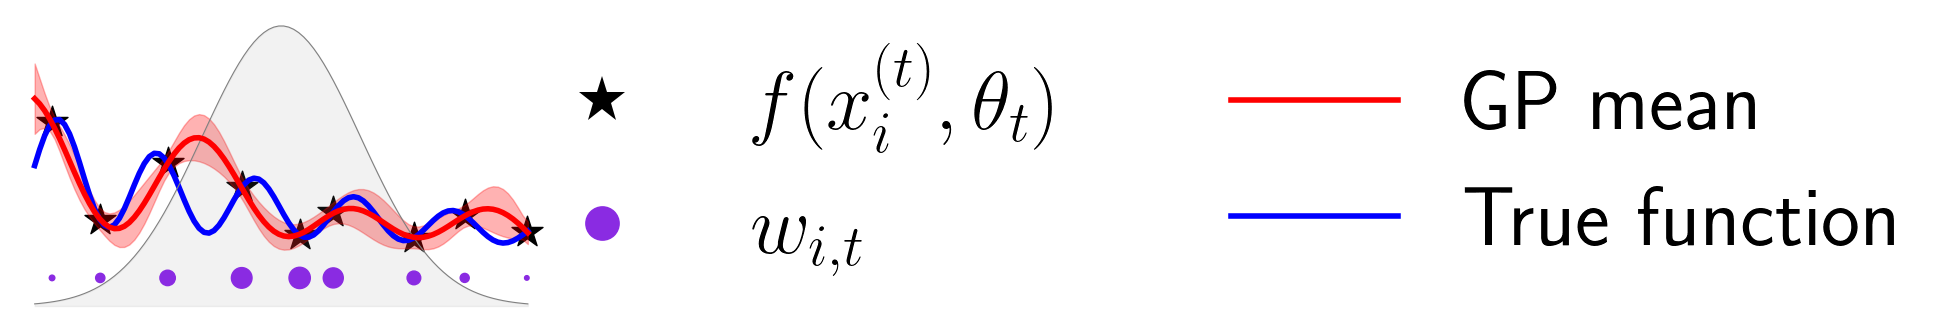

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from matplotlib.lines import Line2D

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')


# Generate sample data
def fancy_positive_function(X):
    return (np.exp(-0.3 * X) * (np.sin(2 * np.pi * X) + 1.5) + 1) / 10


np.random.seed(0)
X_train = np.linspace(0, 5, 9).reshape(-1, 1) 
X_train += np.random.normal(0, 0.1, X_train.shape) 
y_train = fancy_positive_function(X_train).ravel()

# Generate test data
X_test = np.linspace(0, 5, 100).reshape(-1, 1)

# Set regularization parameter and kernel parameter
y_pred = fancy_positive_function(X_test).ravel()

from scipy.stats import norm
mean = 2.5
std_dev = 0.8
x_gaussian = np.linspace(0, 5, 100)
y_gaussian = norm.pdf(x_gaussian, mean, std_dev)

weights = norm.pdf(X_train, mean, 1.0).ravel()


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define a kernel for the GP
kernel = C(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-4, n_restarts_optimizer=10)

# Fit GP to the training data
gp.fit(X_train, y_train)

# Predict the mean and standard deviation of the GP posterior at test points
y_mean, y_std = gp.predict(X_test, return_std=True)


# Plot results
fig, ax = plt.subplots(figsize=(7, 4))
# Set the face color of the figure to transparent
fig.patch.set_visible(False)

# Remove outer frame and axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

scatter1 = plt.scatter(X_train, y_train, color="black", s=550, marker='*', label=r"$g(x_i^{(1)}, \theta_1)$")
plt.plot(X_test, y_pred, color="blue", linewidth=4)
plt.plot(x_gaussian, y_gaussian, color="grey", linewidth=0.8)
plt.plot(X_test, y_mean, color="red", linewidth=4, label="GP mean")
plt.fill_between(X_test.ravel(), y_mean - 1.96 * y_std, y_mean + 1.96 * y_std,
                 color="red", alpha=0.3, label="GP 95% CI")
plt.fill_between(x_gaussian, y_gaussian, color="grey", alpha=0.1)
scatter2 = plt.scatter(X_train, np.full_like(X_train, 0.05),  # place points just below the x-axis
            s=weights * 600,  # scale the weights to represent size
            color="blueviolet", alpha=1.0, label=r"$w_{i, t}$")
# Custom legend entries
legend_elements = [
    Line2D([0], [0], marker='*', color='none', label=r"$f(x_i^{(t)}, \theta_t)$", markeredgewidth=0,
           markerfacecolor="black", markersize=35),  # Larger marker size for legend only
    Line2D([0], [0], marker='o', color='none', label=r"$w_{i, t}$", markeredgewidth=0,
           markerfacecolor="blueviolet", markersize=25),  # Default marker size
    Line2D([0], [0], color='red', lw=4, label="GP mean"),
    Line2D([0], [0], color='blue', lw=4, label="True function")
]
plt.xticks([])
plt.yticks([])
plt.legend(handles=legend_elements, ncol=2, fontsize=60, bbox_to_anchor=(0.80, -0.1), loc='lower left', frameon=False)
plt.savefig('../figures/illustration_1_CBQ.pdf', bbox_inches='tight')
plt.show()


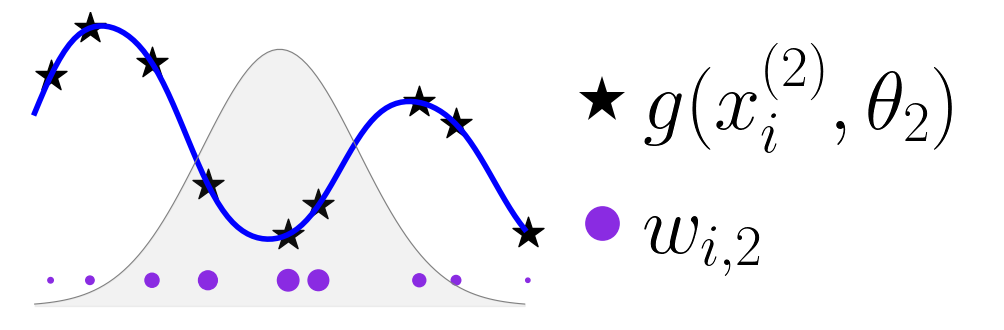

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')


# Generate sample data
def fancy_positive_function(X):
    return np.exp(-0.1 * X) * (np.sin(np.sin(2 * X)) + 1.5) / 4


np.random.seed(1)
X_train = np.linspace(0, 5, 9).reshape(-1, 1) 
X_train += np.random.normal(0, 0.1, X_train.shape) 
y_train = fancy_positive_function(X_train).ravel()

# Generate test data
X_test = np.linspace(0, 5, 100).reshape(-1, 1)

# Set regularization parameter and kernel parameter
y_pred = fancy_positive_function(X_test).ravel()

from scipy.stats import norm
mean = 2.5
std_dev = 0.8
x_gaussian = np.linspace(0, 5, 100)
y_gaussian = norm.pdf(x_gaussian, mean, std_dev)

weights = norm.pdf(X_train, mean, 1.0).ravel()

# Plot results
fig, ax = plt.subplots(figsize=(7, 4))
# Set the face color of the figure to transparent
fig.patch.set_visible(False)

# Remove outer frame and axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

scatter1 = plt.scatter(X_train, y_train, color="black", s=550, marker='*', label=r"$g(x_i^{(2)}, \theta_2)$")
plt.plot(X_test, y_pred, color="blue", linewidth=4)
plt.plot(x_gaussian, y_gaussian, color="grey", linewidth=0.8)
plt.fill_between(x_gaussian, y_gaussian, color="grey", alpha=0.1)
scatter2 = plt.scatter(X_train, np.full_like(X_train, 0.05),  # place points just below the x-axis
            s=weights * 600,  # scale the weights to represent size
            color="blueviolet", alpha=1.0, label=r"$w_{i, 2}$")
# Custom legend entries
legend_elements = [
    Line2D([0], [0], marker='*', color='none', label=r"$g(x_i^{(2)}, \theta_2)$", markeredgewidth=0,
           markerfacecolor="black", markersize=35),  # Larger marker size for legend only
    Line2D([0], [0], marker='o', color='none', label=r"$w_{i, 2}$", markeredgewidth=0,
           markerfacecolor="blueviolet", markersize=25)  # Default marker size
]
plt.xticks([])
plt.yticks([])
plt.legend(handles=legend_elements, fontsize=60, bbox_to_anchor=(0.80, -0.1), loc='lower left', frameon=False, handletextpad=-0.5)
plt.savefig('../figures/illustration_2_BQ.pdf', bbox_inches='tight')
plt.show()


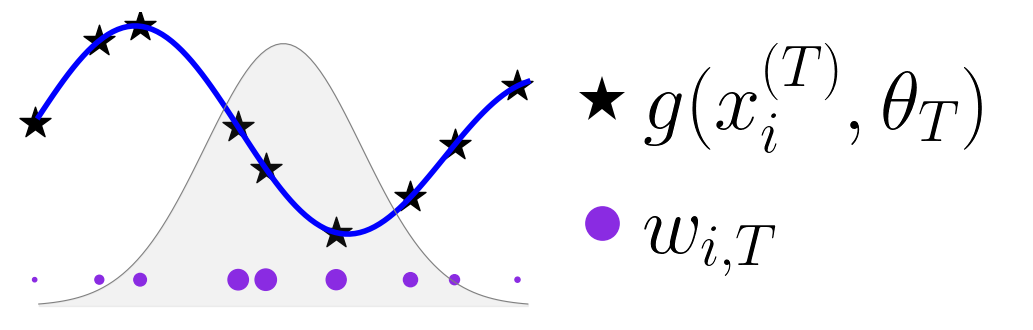

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')


def fancy_positive_function(X):
    return (np.exp(-0.05 * X) * (np.sin(1.5 * X) + 1.8)) / 5

np.random.seed(2)
X_train = np.linspace(0, 5, 9).reshape(-1, 1) 
X_train += np.random.normal(0, 0.1, X_train.shape) 
y_train = fancy_positive_function(X_train).ravel()

# Generate test data
X_test = np.linspace(0, 5, 100).reshape(-1, 1)

# Set regularization parameter and kernel parameter
y_pred = fancy_positive_function(X_test).ravel()

from scipy.stats import norm
mean = 2.5
std_dev = 0.8
x_gaussian = np.linspace(0, 5, 100)
y_gaussian = norm.pdf(x_gaussian, mean, std_dev)

weights = norm.pdf(X_train, mean, 1.0).ravel()

# Plot results
# Plot results
fig, ax = plt.subplots(figsize=(7, 4))
# Set the face color of the figure to transparent
fig.patch.set_visible(False)

# Remove outer frame and axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

scatter1 = plt.scatter(X_train, y_train, color="black", s=550, marker='*', label=r"$g(x_i^{(T)}, \theta_T)$")
plt.plot(X_test, y_pred, color="blue", linewidth=4)
plt.plot(x_gaussian, y_gaussian, color="grey", linewidth=0.8)
plt.fill_between(x_gaussian, y_gaussian, color="grey", alpha=0.1)
scatter2 = plt.scatter(X_train, np.full_like(X_train, 0.05),  # place points just below the x-axis
            s=weights * 600,  # scale the weights to represent size
            color="blueviolet", alpha=1.0, label=r"$w_{i, T}$")
legend_elements = [
    Line2D([0], [0], marker='*', color='none', label=r"$g(x_i^{(T)}, \theta_T)$", markeredgewidth=0,
           markerfacecolor="black", markersize=35),  # Larger marker size for legend only
    Line2D([0], [0], marker='o', color='none', label=r"$w_{i, T}$", markeredgewidth=0,
           markerfacecolor="blueviolet", markersize=25)  # Default marker size
]
plt.xticks([])
plt.yticks([])
plt.legend(handles=legend_elements, fontsize=60, bbox_to_anchor=(0.80, -0.1), loc='lower left', frameon=False, handletextpad=-0.5)
plt.savefig('../figures/illustration_3.pdf', bbox_inches='tight')
plt.show()


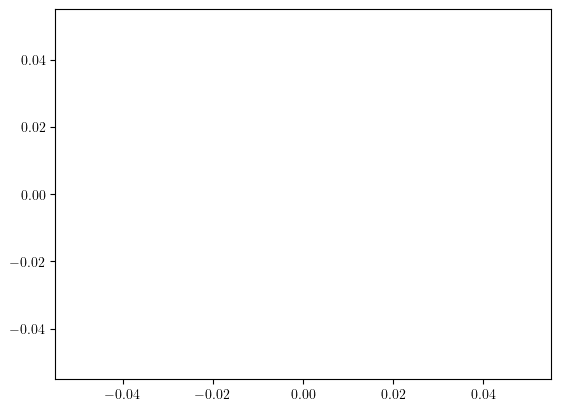

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')


# Generate sample data
def fancy_positive_function(X):
    return np.exp(-0.3 * X) * (np.sin(np.sin(2.7 * X)) + 2.5) / 3


np.random.seed(4)
X_train = np.linspace(0, 5, 6).reshape(-1, 1)
X_train += np.random.normal(0, 0.1, X_train.shape)
y_train = fancy_positive_function(X_train).ravel() + np.random.normal(0, 0.05, X_train.shape).ravel()

# Generate test data
X_test = np.linspace(0, 5, 100).reshape(-1, 1)

# Define RBF kernel function
def rbf_kernel(X1, X2, gamma=0.5):
    pairwise_sq_dists = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    return np.exp(-gamma * pairwise_sq_dists)

y_pred = fancy_positive_function(X_test).ravel()

from scipy.stats import norm
mean = 2.5
std_dev = 0.5
x_gaussian = np.linspace(0, 5, 100)
y_gaussian = norm.pdf(x_gaussian, mean, std_dev)

weights = norm.pdf(X_train, mean, 1.0).ravel()


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define a kernel for the GP
kernel = C(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-4, n_restarts_optimizer=10)

# Fit GP to the training data
gp.fit(X_train, y_train)

# Predict the mean and standard deviation of the GP posterior at test points
y_mean, y_std = gp.predict(X_test, return_std=True)


# Original Plot Code
fig, ax = plt.subplots(figsize=(9, 5))
# Set the face color of the figure to transparent
fig.patch.set_visible(False)

# Remove outer frame and axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
plt.plot(X_test, y_pred, color="brown", linewidth=4, label=r"$I(\theta_t)$")
plt.scatter(X_train, y_train, color="black", s=550, marker='h', label=r"$\hat{I}_{\text{BQ}}(\theta_t)$")
plt.plot(X_test, y_mean, color="darkgreen", linewidth=4, label="GP mean")
plt.fill_between(X_test.ravel(), y_mean - 1.96 * y_std, y_mean + 1.96 * y_std,
                 color="darkgreen", alpha=0.3, label="GP 95% CI")
plt.xticks([])
plt.yticks([])
plt.savefig('../figures/illustration_4_BQ.pdf', bbox_inches='tight')
# Capture legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.close()


from matplotlib.lines import Line2D
from matplotlib.patches import Patch

proxies = [
    Line2D([0], [0], color="brown", linewidth=4, label=r"$I(\theta_t)$"),
    Line2D([0], [0], color="darkgreen", linewidth=4, label="GP mean"),
    plt.scatter([], [], color="black", s=550, marker='h', label=r"$\hat{I}_{\text{BQ}}(\theta_t)$")
]

labels = [r"$I(\theta_t)$", "GP mean", r"$\hat{I}_{\text{BQ}}(\theta_t)$"]

fig_legend = plt.figure(figsize=(3, 1.5))
fig_legend.legend(proxies, labels, loc='center', fontsize=60, frameon=False, 
                  handletextpad=0.1, markerscale=2.5, ncol=1, columnspacing=0.2)
fig_legend.savefig('../figures/illustration_legend_only_BQ.pdf', bbox_inches='tight')
plt.close(fig_legend)



In [ ]:
handles